In [1]:
print("hello")

hello


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("Crop_recommendation.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
label=df.groupby('label')
label.size()

label
apple          100
banana         100
blackgram      100
chickpea       100
coconut        100
coffee         100
cotton         100
grapes         100
jute           100
kidneybeans    100
lentil         100
maize          100
mango          100
mothbeans      100
mungbean       100
muskmelon      100
orange         100
papaya         100
pigeonpeas     100
pomegranate    100
rice           100
watermelon     100
dtype: int64

In [5]:
label.get_group('rice')
label.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2100,91,21,26,26.333780,57.364700,7.261314,191.654941,coffee
2101,107,21,26,26.452885,55.322227,7.235070,144.686134,coffee
2102,83,38,35,25.708227,52.886671,7.189156,136.732509,coffee
2103,108,24,31,24.128325,56.181077,6.431900,147.275782,coffee


In [6]:
label['humidity'].mean()

label
apple          92.333383
banana         80.358123
blackgram      65.118426
chickpea       16.860439
coconut        94.844272
coffee         58.869846
cotton         79.843474
grapes         81.875228
jute           79.639864
kidneybeans    21.605357
lentil         64.804785
maize          65.092249
mango          50.156573
mothbeans      53.160418
mungbean       85.499975
muskmelon      92.342802
orange         92.170209
papaya         92.403388
pigeonpeas     48.061633
pomegranate    90.125504
rice           82.272822
watermelon     85.160375
Name: humidity, dtype: float64

In [7]:
labels = list(label.mean().index)
labels

['apple',
 'banana',
 'blackgram',
 'chickpea',
 'coconut',
 'coffee',
 'cotton',
 'grapes',
 'jute',
 'kidneybeans',
 'lentil',
 'maize',
 'mango',
 'mothbeans',
 'mungbean',
 'muskmelon',
 'orange',
 'papaya',
 'pigeonpeas',
 'pomegranate',
 'rice',
 'watermelon']

In [8]:
nitrogen = list(label[["N"]].mean().values.ravel())
nitrogen

[20.8,
 100.23,
 40.02,
 40.09,
 21.98,
 101.2,
 117.77,
 23.18,
 78.4,
 20.75,
 18.77,
 77.76,
 20.07,
 21.44,
 20.99,
 100.32,
 19.58,
 49.88,
 20.73,
 18.87,
 79.89,
 99.42]

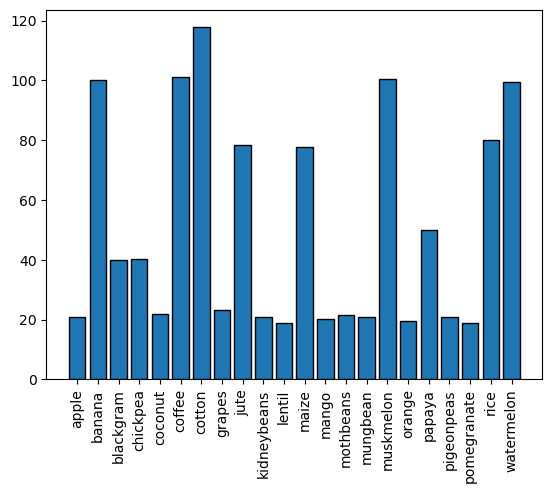

In [9]:
plt.bar(x = labels, height = nitrogen, ec = "k")
plt.xticks(labels, rotation = 90)
plt.show()

In [10]:
x = df.drop("label", axis = 1)

In [11]:
# standard scaler --- normalize --- to deal with the outliers
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_transformed = sc.fit_transform(x)
x_transformed.shape

(2200, 7)

In [12]:
desc = pd.DataFrame(x_transformed).describe()

## needs attention ##

In [13]:
# df['N'].quantile(0.25) 

In [14]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [15]:
desc_formatted = desc.applymap(lambda x: f"{int(x):d}")
desc_formatted

C:\Users\Madhur\AppData\Local\Temp\ipykernel_19348\2167129568.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  desc_formatted = desc.applymap(lambda x: f"{int(x):d}")


,0,1,2,3,4,5,6
count,2200,2200,2200,2200,2200,2200,2200
mean,0,0,0,0,0,0,0
std,1,1,1,1,1,1,1
min,-1,-1,0,-3,-2,-3,-1
25%,0,0,0,0,0,0,0
50%,0,0,0,0,0,0,0
75%,0,0,0,0,0,0,0
max,2,2,3,3,1,4,3


In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans()
kmeans.fit(x_transformed)

KMeans()

In [17]:
label = kmeans.labels_

In [18]:
df["cluster_8"] = label

In [19]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,cluster_8
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,6
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,6
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,6
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,6
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,6
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,6
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,2
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,6
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,2


In [20]:
df["cluster_8"].value_counts()

cluster_8
2    521
4    400
6    297
5    219
0    200
1    198
7    188
3    177
Name: count, dtype: int64

In [21]:
df[df["label"] == "rice"]["cluster_8"].value_counts()


cluster_8
6    100
Name: count, dtype: int64

In [22]:
df[df["cluster_8"] == 1]["label"].value_counts()

label
mango         87
pigeonpeas    69
mothbeans     41
lentil         1
Name: count, dtype: int64

In [23]:
# model evaluation techniques

from sklearn.metrics import silhouette_score
silhouette_score(x_transformed, label)

0.33422996701918656

In [24]:
#wcss  -->  inertia_

kmeans.inertia_

4883.880124988108

In [25]:
wcss = {}
for i in range (5, 51):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x_transformed)
    wcss[i] = kmeans.inertia_

In [26]:
wcss

{5: 6868.015073390174,
 6: 6066.221609957842,
 7: 5719.75588129488,
 8: 4951.665195463671,
 9: 4733.5233005050595,
 10: 4339.481803570713,
 11: 4091.572489023454,
 12: 3690.7944210741716,
 13: 3620.2092528749586,
 14: 3373.772830249133,
 15: 3124.381401043036,
 16: 2985.1214492213176,
 17: 2843.219711164682,
 18: 2625.4423551007176,
 19: 2564.3960324618647,
 20: 2625.3079093768265,
 21: 2435.6412622897756,
 22: 2343.6041142711465,
 23: 2169.9558747983356,
 24: 2160.4081077559085,
 25: 2095.290203803345,
 26: 2005.5635683272249,
 27: 1947.9951740035456,
 28: 1853.1548049249832,
 29: 1850.6009232868337,
 30: 1772.384295026075,
 31: 1755.3602519062183,
 32: 1680.8100137200827,
 33: 1604.4746010353692,
 34: 1617.9426092044027,
 35: 1580.3531932916976,
 36: 1576.1463919796913,
 37: 1509.9315410772804,
 38: 1516.2590671236537,
 39: 1477.5960637628525,
 40: 1428.6668945687609,
 41: 1413.6886106770712,
 42: 1384.599412023288,
 43: 1348.4978340765779,
 44: 1340.2580813489326,
 45: 1333.71234860

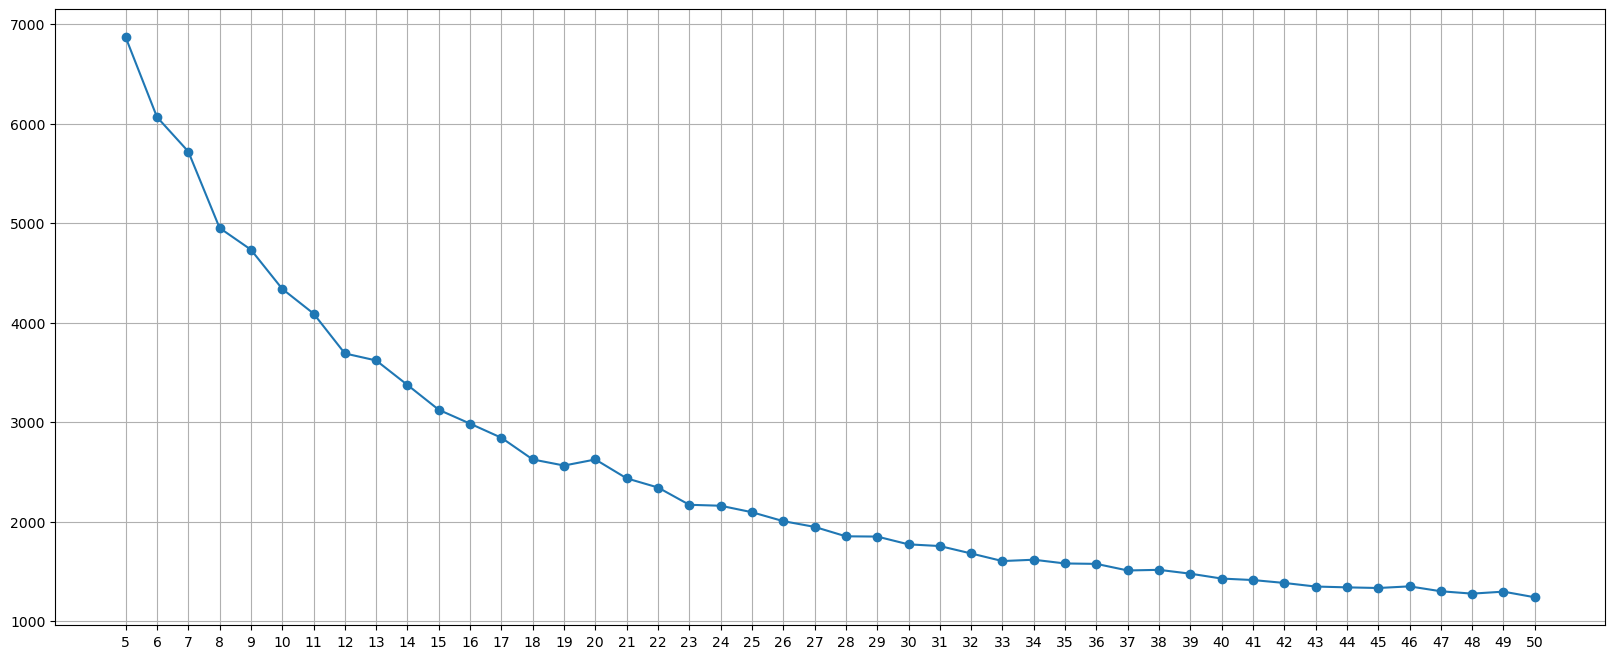

In [27]:
plt.figure(figsize = (20, 8))
plt.plot(wcss.keys(), wcss.values(), marker = "o")

plt.xticks(list(wcss.keys()))
plt.grid(True)
plt.show()

In [28]:
import joblib

In [29]:
joblib.dump(kmeans, "crop_reco_kmeans.lb")

['crop_reco_kmeans.lb']

In [30]:
joblib.dump(sc, "scaler.lb")

['scaler.lb']

In [31]:
joblib.dump(df, "crop_reco_df.lb")

['crop_reco_df.lb']